10.625966155157828 15.117227882000336


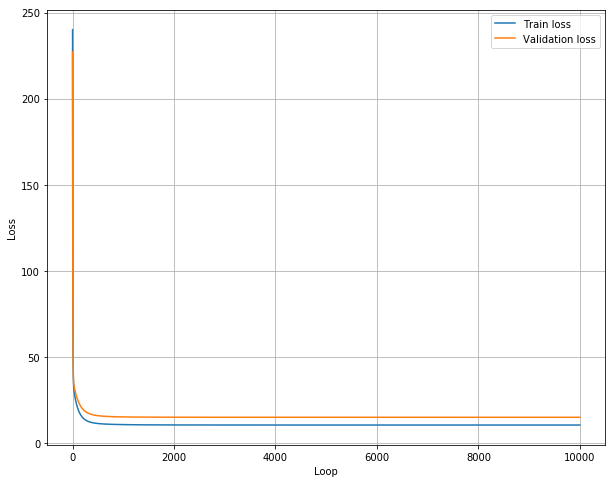

In [236]:
%matplotlib inline
from sklearn import datasets as ds  
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#读取libsvm格式数据  
train_data,train_target=ds.load_svmlight_file("/Users/humeng/Desktop/housing_scale.txt")  
                                       
#调整数据格式
train_target = train_target.reshape(-1, 1)

#避免过拟合，采用交叉验证，验证集占训练集30%，
x_train, x_validation, y_train, y_validation = train_test_split(train_data,train_target,
                                                    test_size=0.3, random_state=0)
#print (x_train.shape,x_validation.shape)

#初始化参数b
b1 = np.ones((x_train.shape[0],1))
x_train = np.hstack((x_train.toarray(),b1))
b2 = np.ones((x_validation.shape[0],1))
x_validation = np.hstack((x_validation.toarray(),b2))


#参数初始化
l_train = []
l_validation = []
learningrate = 0.001
lamda = 1
loop = 10000
w = np.zeros((x_train.shape[1],1))

#对loss函数求导
def gradient(lamda,w,x,y):
    return (lamda * w - np.dot(x.T,(y - np.dot(x,w))))/x.shape[1]

#求loss
def loss(w,x,y):
    l = float((0.5 * lamda * np.dot(w.T,w) + 0.5 * np.dot((y - np.dot(x,w)).T,(y - np.dot(x,w))))/x.shape[0])
    return l

for k in range(loop):
    #求得所有样本对Loss函数的梯度
    grad = gradient(lamda,w,x_train,y_train)
    w = w - learningrate * grad
    l_train.append(loss(w,x_train,y_train))
    l_validation.append(loss(w,x_validation,y_validation))
print(l_train[-1],l_validation[-1])

#设置图像
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(np.arange(loop),l_train,label='Train loss')
plt.plot(np.arange(loop),l_validation,label='Validation loss')
plt.xlabel('Loop')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

plt.show()